In [1]:
# data science
import pandas as pd
import numpy as np

# machine learning
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier


import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
# viz
#import graphviz
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 0. Read csv and clean data

In [2]:
df = pd.read_csv("./EEG_data.csv")
df.loc[:200,:]

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0
5,0.0,0.0,44.0,66.0,73.0,1786446.0,176766.0,59352.0,26157.0,15054.0,33669.0,33782.0,31750.0,0.0,0.0
6,0.0,0.0,43.0,69.0,130.0,635191.0,122446.0,90107.0,65072.0,36230.0,53019.0,62938.0,59307.0,0.0,0.0
7,0.0,0.0,40.0,61.0,-2.0,161098.0,12119.0,1963.0,809.0,1277.0,3186.0,3266.0,2518.0,0.0,0.0
8,0.0,0.0,43.0,69.0,17.0,492796.0,120998.0,63697.0,68242.0,10769.0,88403.0,73756.0,22676.0,0.0,0.0
9,0.0,0.0,47.0,69.0,-59.0,82048.0,116131.0,47317.0,26197.0,41642.0,28866.0,32551.0,41810.0,0.0,0.0


### Cleaning

In [3]:
df = df.drop(["SubjectID", "VideoID"], axis=1)
df = df[df["predefinedlabel"].isin([0, 1])]
for col in df.columns:
    if col == 'predefinedlabel': continue
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
df

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.56,0.43,0.568010,0.076059,0.030120,0.024623,0.023590,0.026169,0.027407,0.016845,0.006150,0.0,0.0
1,0.40,0.35,0.487912,0.018500,0.009331,0.001049,0.002201,0.002569,0.002240,0.002683,0.002031,0.0,0.0
2,0.47,0.48,0.524786,0.191187,0.127578,0.147448,0.061072,0.033987,0.079334,0.029020,0.018806,0.0,0.0
3,0.47,0.57,0.498901,0.507488,0.042999,0.044698,0.016798,0.010756,0.037961,0.025328,0.025168,0.0,0.0
4,0.44,0.53,0.498168,0.253442,0.117798,0.027081,0.087401,0.042428,0.060534,0.022707,0.022066,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,0.64,0.38,0.490598,0.032068,0.003303,0.000516,0.021369,0.003623,0.024144,0.001317,0.000711,1.0,0.0
12807,0.61,0.35,0.432967,0.081381,0.265128,0.111806,0.143378,0.037298,0.347204,0.018541,0.007424,1.0,0.0
12808,0.60,0.29,0.396093,0.171671,0.051293,0.029246,0.038469,0.010267,0.016393,0.010355,0.001500,1.0,0.0
12809,0.60,0.29,0.479609,0.092281,0.009086,0.008352,0.009765,0.001813,0.001994,0.006247,0.001307,1.0,0.0


### Preprocessing

In [4]:
# Random shuffle so that labels are not clustered
df = df.sample(frac=1, random_state = 1).reset_index(drop=True)
df

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.00,0.00,0.417827,0.293120,0.153390,0.015698,0.039047,0.046898,0.101441,0.091757,0.029561,0.0,1.0
1,0.48,0.51,0.489377,0.254506,0.044620,0.013299,0.036181,0.011870,0.006721,0.007809,0.001678,0.0,1.0
2,0.70,0.40,0.505495,0.231240,0.022648,0.008634,0.004287,0.022071,0.041064,0.019772,0.016140,0.0,1.0
3,0.40,0.77,0.456654,0.434374,0.185498,0.066741,0.067700,0.031332,0.015539,0.010508,0.036084,1.0,1.0
4,0.51,0.87,0.534554,0.187854,0.011714,0.015411,0.007623,0.009701,0.005064,0.002051,0.000499,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,0.61,0.69,0.517216,0.431144,0.063426,0.119992,0.150074,0.067566,0.044352,0.021630,0.014327,1.0,1.0
12807,0.43,0.38,0.468376,0.062383,0.040838,0.024344,0.012618,0.013018,0.016410,0.007233,0.004718,1.0,0.0
12808,0.64,0.54,0.498168,0.104693,0.006972,0.004961,0.006049,0.002269,0.002659,0.000577,0.000385,0.0,0.0
12809,0.24,0.53,0.481563,0.198073,0.034533,0.013238,0.044091,0.008556,0.031107,0.022799,0.000841,0.0,1.0


In [5]:
# Train : Test = 8:2
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
n_objects = df.shape[0]
n_train = int(n_objects * 0.8)
df_train = df.iloc[:n_train]
df_test = df.iloc[n_train:]
df_train

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.00,0.00,0.417827,0.293120,0.153390,0.015698,0.039047,0.046898,0.101441,0.091757,0.029561,0.0,1.0
1,0.48,0.51,0.489377,0.254506,0.044620,0.013299,0.036181,0.011870,0.006721,0.007809,0.001678,0.0,1.0
2,0.70,0.40,0.505495,0.231240,0.022648,0.008634,0.004287,0.022071,0.041064,0.019772,0.016140,0.0,1.0
3,0.40,0.77,0.456654,0.434374,0.185498,0.066741,0.067700,0.031332,0.015539,0.010508,0.036084,1.0,1.0
4,0.51,0.87,0.534554,0.187854,0.011714,0.015411,0.007623,0.009701,0.005064,0.002051,0.000499,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10243,0.00,0.00,0.000000,0.075209,0.104573,0.016795,0.032925,0.016195,0.013742,0.011037,0.022783,1.0,1.0
10244,0.47,0.69,0.502808,0.036662,0.011418,0.012376,0.007118,0.006136,0.001964,0.000978,0.000975,1.0,0.0
10245,0.78,0.56,0.498168,0.103168,0.008186,0.003961,0.006533,0.002070,0.007223,0.002955,0.006338,0.0,1.0
10246,0.47,0.44,0.509890,0.036579,0.057042,0.001124,0.004309,0.004168,0.003815,0.001982,0.000539,1.0,1.0


In [6]:
def encode(df_to_encode):
    le = preprocessing.LabelEncoder()
    df_encoded = df_to_encode.copy()

    x_encoded = df_encoded[["Attention", "Mediation", "Raw", "Delta", "Theta", "Alpha1", "Alpha2", "Beta1", "Beta2", "Gamma1", "Gamma2"]]
    y_encoded = df_encoded["predefinedlabel"]
    
    return (x_encoded, y_encoded)

### Correlation Analysis: Feature v.s. Label

In [7]:
X = ["Attention", "Mediation", "Raw", "Delta", "Theta", "Alpha1", "Alpha2", "Beta1", "Beta2", "Gamma1", "Gamma2"]
for x in X:
    print(f"Pearson Correlation between {x} and label =  {stats.pearsonr(df[x], df['predefinedlabel'])}")
print()
for x in X:
    print(f"Kendall Tau between {x} and label =  {stats.kendalltau(df[x], df['predefinedlabel'])}")
print()
for x in X:
    print(f"Spearman R between {x} and label =  {stats.spearmanr(df[x], df['predefinedlabel'])}")

Pearson Correlation between Attention and label =  (0.001558952191030469, 0.8599530220225221)
Pearson Correlation between Mediation and label =  (0.01575061100480981, 0.07463834983139137)
Pearson Correlation between Raw and label =  (0.010598098541918332, 0.23034535571400547)
Pearson Correlation between Delta and label =  (0.012333456712262096, 0.16274832809499637)
Pearson Correlation between Theta and label =  (0.0016022148641887583, 0.8561083925501339)
Pearson Correlation between Alpha1 and label =  (0.011802350474210663, 0.1816233725408591)
Pearson Correlation between Alpha2 and label =  (-0.001838474681026856, 0.8351751753308841)
Pearson Correlation between Beta1 and label =  (0.008542773223925156, 0.3336225461218689)
Pearson Correlation between Beta2 and label =  (-0.0935124197951165, 2.780218294489366e-26)
Pearson Correlation between Gamma1 and label =  (-0.0657642932437725, 9.269373700200801e-14)
Pearson Correlation between Gamma2 and label =  (-0.02840292643128641, 0.0013038106

# 1. KNN

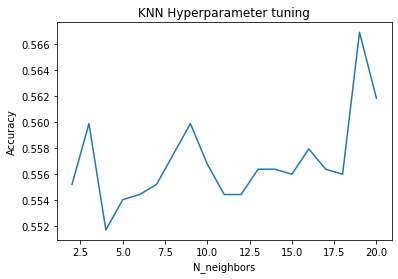

In [8]:
x_train, y_train = encode(df_train)
x_test, y_test = encode(df_test)
x = []
accuracy = []

for n in range(2, 21):
        
    clf = KNeighborsClassifier(n_neighbors = n)        # n_neighbors=5
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    x.append(n)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))#np.mean(accuracies))

    
plt.xlabel("N_neighbors")
plt.ylabel("Accuracy")
plt.title("KNN Hyperparameter tuning")
plt.plot(x,accuracy)

# 2. Naive Bayes

In [9]:
clf = GaussianNB()#CategoricalNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

y_pred_bayes = y_pred

Predicted: [1. 1. 1. ... 1. 1. 1.]
Accuracy: 0.49590323839250877


# 3. Decision Tree

In [10]:
# ID3
# "entropy" for the information gain
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=9)
clf.fit(x_train, y_train)
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=["Attention", "Mediation", "Raw", "Delta", "Theta", "Alpha1", "Alpha2", "Beta1", "Beta2", "Gamma1", "Gamma2"],
                                class_names="Confusion",
                                filled=True, rounded=True,
                                special_characters=True)  
# graph = graphviz.Source(dot_data)
# graph
y_pred = clf.predict(x_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Predicted: [0. 0. 0. ... 1. 0. 0.]
Accuracy: 0.5466250487709715


# 4. SVM

In [11]:
# rbf kernel
clf = SVC()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Predicted: [0. 1. 1. ... 0. 0. 1.]
Accuracy: 0.5485758876316816


In [12]:
#linear
clf = LinearSVC()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Predicted: [0. 0. 0. ... 0. 0. 0.]
Accuracy: 0.5364806866952789


In [ ]:
x_train, y_train = encode(df_train)
x_test, y_test = encode(df_test)
x = []
accuracy = []

for n in range(50, 160, 10):
    clf = RandomForestClassifier(n_estimators=n) #default = 100
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    x.append(n)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))#np.mean(accuracies))

    
plt.xlabel("N_estimators")
plt.ylabel("Accuracy")
plt.title("Random Forest Hyperparameter tuning")
plt.plot(x,accuracy)

# Some Other Classification Models

In [ ]:
clf_cart = tree.DecisionTreeClassifier(max_depth=2)
clf_forest = RandomForestClassifier()
clf_boost = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=2), random_state=21)
clf_mlp = MLPClassifier(hidden_layer_sizes=(50,50,), max_iter=1000, tol=0.001, random_state=42)

clf_cart.fit(x_train, y_train)
clf_forest.fit(x_train, y_train)
clf_boost.fit(x_train, y_train)
clf_mlp.fit(x_train, y_train)

print("Accuracy:")
print("- CART:", metrics.accuracy_score(y_test, clf_cart.predict(x_test)))
print("- Random Forest:", metrics.accuracy_score(y_test, clf_forest.predict(x_test)))
print("- AdaBoost:", metrics.accuracy_score(y_test, clf_boost.predict(x_test)))
print("- MLP:", metrics.accuracy_score(y_test, clf_mlp.predict(x_test)))

# 5-fold Cross-validation Accuracy & F1 Score

In [ ]:
# Random Forest Classifier
n_objects = df.shape[0]
print("Total = ", n_objects)
n_test = int(n_objects * 0.2)

accuracies_random = []
accuracies_majority = []
f1_random = []
f1_majority = []
for i in range(5):
    df_test = df.iloc[n_test*i:n_test*(i+1)]
    train_indexes = list(range(n_test*i)) + list(range(n_test*(i+1), n_objects))
    df_train = df.iloc[train_indexes]
    X_train = df_train[["Attention", "Mediation", "Raw", "Delta", "Theta", "Alpha1", "Alpha2", "Beta1", "Beta2", "Gamma1", "Gamma2"]]
    y_train = df_train["predefinedlabel"]
    X_test  = df_test[["Attention", "Mediation", "Raw", "Delta", "Theta", "Alpha1", "Alpha2", "Beta1", "Beta2", "Gamma1", "Gamma2"]]
    y_test = df_test["predefinedlabel"]
    #clf_forest = KNeighborsClassifier()#RandomForestClassifier()
    #clf_forest.fit(X_train, y_train)
    #y_predict = clf_forest.predict(X_test)
    print(y_test.shape)
    #y_predict_random = [random.choice([0, 1]) for _ in range(2562)]
    unique, counts = np.unique(y_train, return_counts = True)
    print(unique, counts)
    if counts[1] > counts[0]:
        y_predict_majority = [1] * 2562#dict(zip(unique, counts))
    else:
        y_predict_majority = [0] * 2562
    print(y_predict[:10])
    #print(y_predict_random)
    #print(y_predict_majority)
    #accuracy_random = metrics.accuracy_score(y_test, y_predict_random)
    accuracy_majority = metrics.accuracy_score(y_test, y_predict_majority)
    #accuracies_random.append(accuracy_random)
    accuracies_majority.append(accuracy_majority)
    #f_score_random = metrics.f1_score(y_test, y_predict_random)
    f_score_majority = metrics.f1_score(y_test, y_predict_majority)
    #f1_random.append(f_score_random)
    f1_majority.append(f_score_majority)
    
    #print(f"Random Forest {i} Accuracy = {accuracy_random}, F1 = {f_score_random}")
    print(f"Random Forest {i} Accuracy = {accuracy_majority}, F1 = {f_score_majority}")

#print("Average Accuracy   = ", np.mean(accuracies_random), "std = ", np.std(accuracies_random))
#print("Average F1   = ", np.mean(f1_random), "std = ", np.std(f1_random))
print("Average Accuracy   = ", np.mean(accuracies_majority), "std = ", np.std(accuracies_majority))
print("Average F1   = ", np.mean(f1_majority), "std = ", np.std(f1_majority))

# TBC